In [1]:
import numpy as np
import pandas as pd
import pickle
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.stats import hmean
from scipy.spatial.distance import cdist
from scipy import stats
import numbers
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline
import numpy as np 
import statsmodels.api as sm 
import pylab as py 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from scipy.stats import shapiro

import pandas as pd
import numpy as np
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


F1: loading data in a dataframe (either CSV or Excel - can be generalized for databases)

In [2]:
def load_file(filepath, ext):
    ext=ext
    if ext=='csv':
        data =  []
        col = []
        checkcol = False
        with open(filepath) as f:
            for val in f.readlines():
                val = val.replace("\n","")
                val = val.split(',')
                if checkcol is False:
                    col = val
                    checkcol = True
                else:
                    data.append(val)
        df = pd.DataFrame(data=data, columns=col)
    elif ext=='xlsx':
        df = pd.read_excel(filepath)
    else:
        df='No such file can be extracted'
    return df

df=load_file('C:\\Users\\waliullah\\Desktop\\Machine Learning\\Assignment-6\\Stroke\\health.xlsx','xlsx')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


Function-2: checking shape, column types, and see the first/last 'n' rows using head/tail (where n is one of the arguments of F2)


In [4]:
def data_display(data, n):
    # Create a DataFrame object
    df = pd.DataFrame(data)
    #print("Contents of the Dataframe : ")
    #print(df)
    
    print('**** Shape of the Data ****')
    #df.shape
    print(df.shape)
    print('**** Columns Name ****')
    print(df.columns)
    print('**** Data Type of Columns ****')
    print(df.dtypes)
    
    print('**** Select first n Rows from a Dataframe using head() function ****')
    # Select the top n rows of the Dataframe
    dfObj1 = df.head(n)
    print("First", n, "rows of the Dataframe : ")
    print(dfObj1)
    print('**** Select last n Rows from a Dataframe using tail() function ****')
    # Select the bottom n rows of the Dataframe
    dfObj2 = df.tail(n)
    print("Last",n, "rows of the Dataframe : ")
    print(dfObj2)

#call function
data_display(df, 10)

**** Shape of the Data ****
(5110, 12)
**** Columns Name ****
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
**** Data Type of Columns ****
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
**** Select first n Rows from a Dataframe using head() function ****
First 10 rows of the Dataframe : 
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             

F5: determine the missing values in the whole dataset

In [5]:
def misval(data):
    df=data
    print (df.isnull())
    #print(df.isnull.sum())
    mano.matrix(df)

         id  gender    age  hypertension  heart_disease  ever_married  \
0     False   False  False         False          False         False   
1     False   False  False         False          False         False   
2     False   False  False         False          False         False   
3     False   False  False         False          False         False   
4     False   False  False         False          False         False   
...     ...     ...    ...           ...            ...           ...   
5105  False   False  False         False          False         False   
5106  False   False  False         False          False         False   
5107  False   False  False         False          False         False   
5108  False   False  False         False          False         False   
5109  False   False  False         False          False         False   

      work_type  Residence_type  avg_glucose_level    bmi  smoking_status  \
0         False           False              F

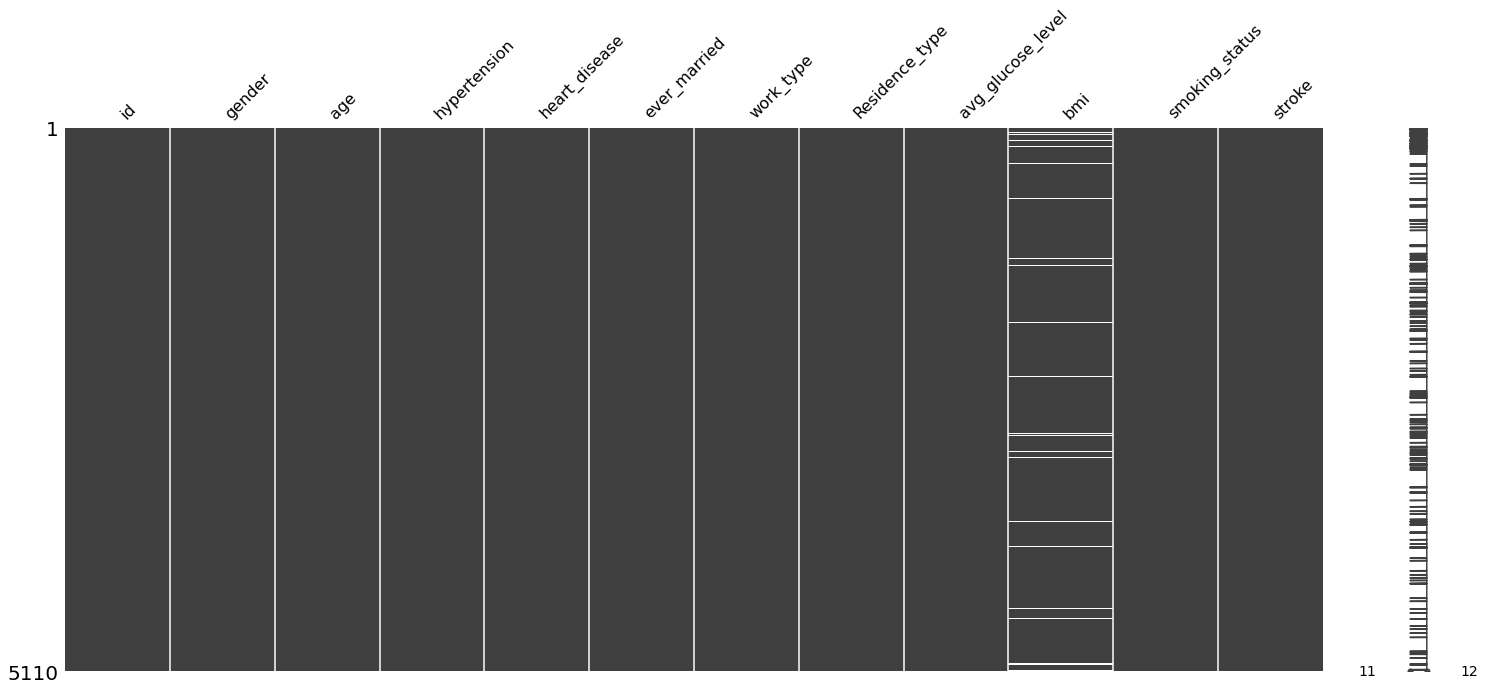

In [6]:
misval(df)

F6: analyze missing values of one or more columns using mano module

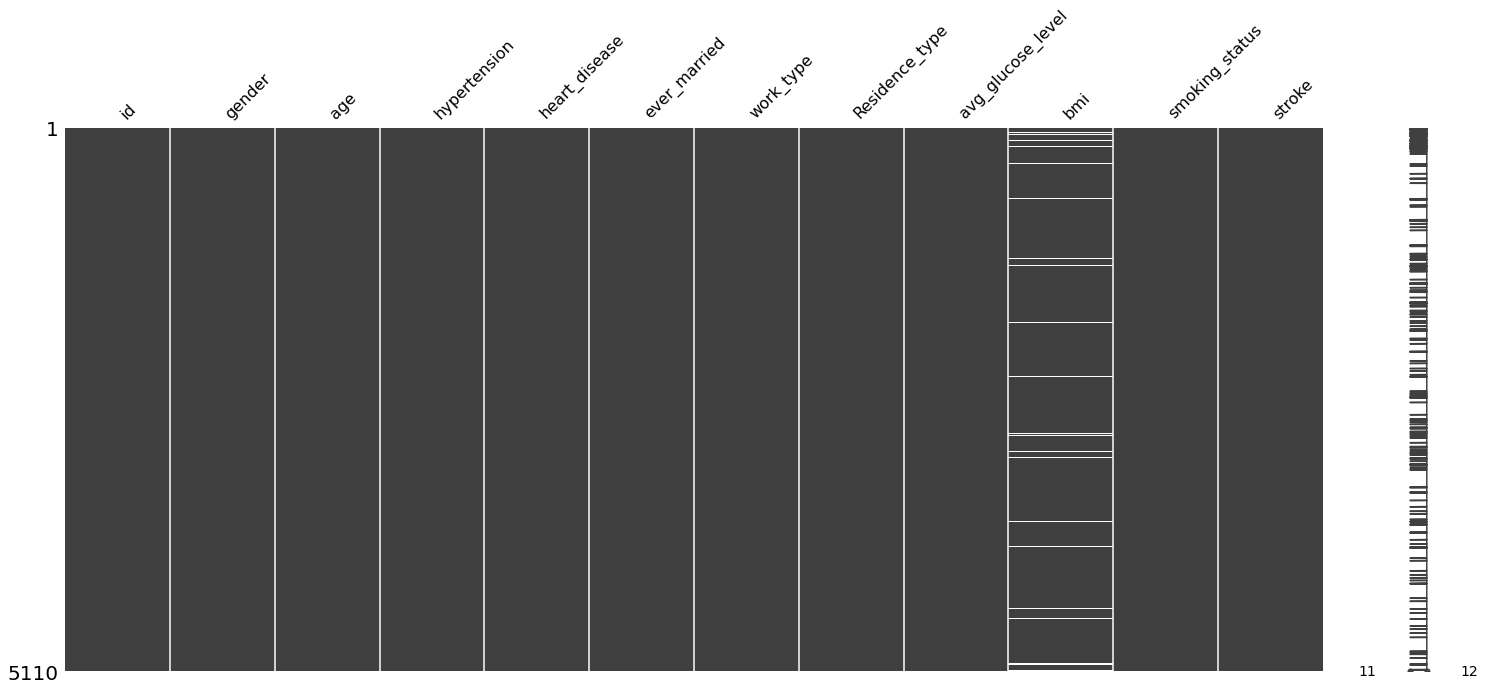

In [7]:
def misvalmano(data):
    mano.matrix(data)

    
misvalmano(df)

F7: cater for missing values (input the column with missing value, and the method through which you want to cater for the missing values)

In [8]:
def misvalfill(data):
    col=input("Enter Column Name:")
    print("Choose among Mean, LinInter")
    option=input("Enter Option Name:")
    if option=='Mean':
        data[col]=data[col].fillna(data[col].mean())
    #elif option=='Mode':
     #   data[col]=data[col].fillna(data[col].value_counts())
    elif option=='LinInter':
        data[col]=data[col].fillna(data[col].interpolate(method ='linear', limit_direction ='forward'))
    return data

df=misvalfill(df)

Enter Column Name:bmi
Choose among Mean, LinInter
Enter Option Name:LinInter


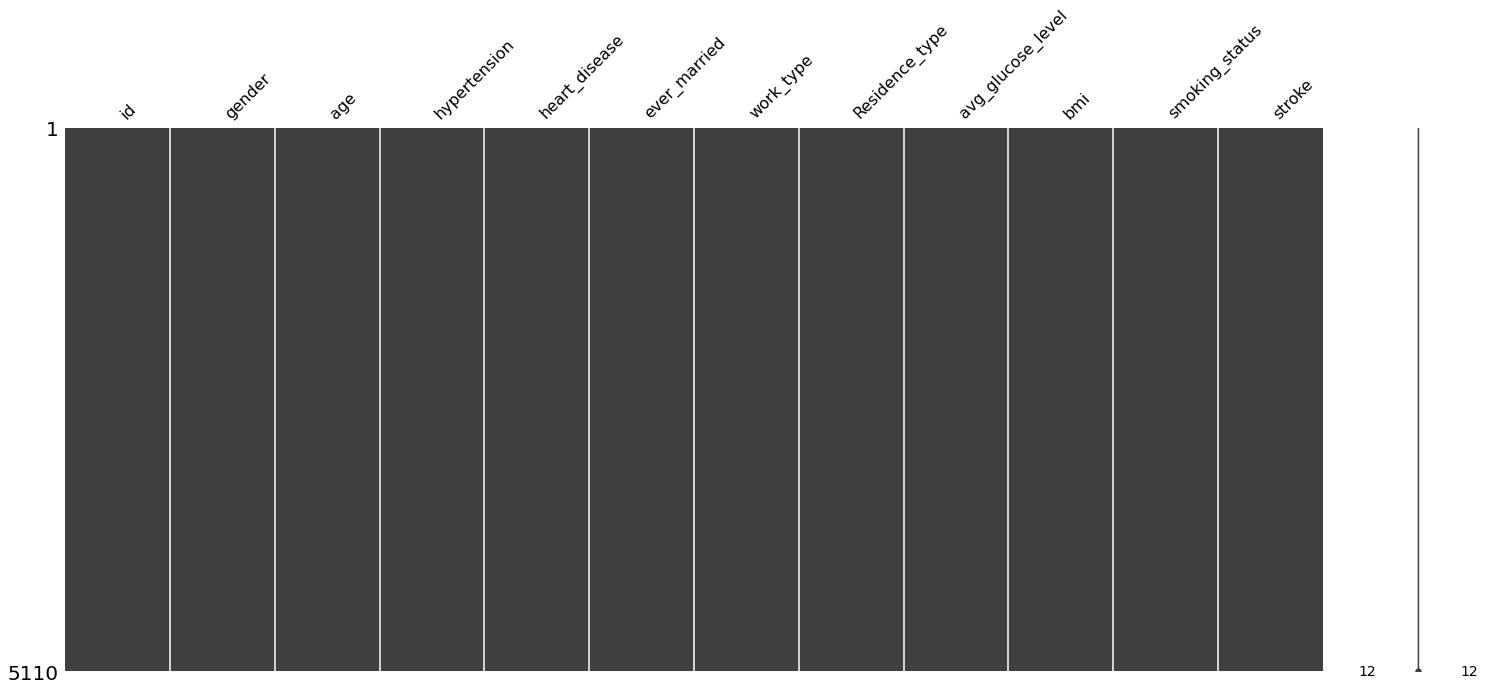

In [9]:
misvalmano(df)

F8: Function for numerical data analysis - includes histogram, boxplot, qqplot, describe, and statistical tests for normality

Enter Column Name:stroke
Histogram of stroke Data


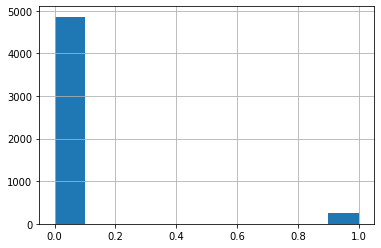

Boxplot of stroke Data


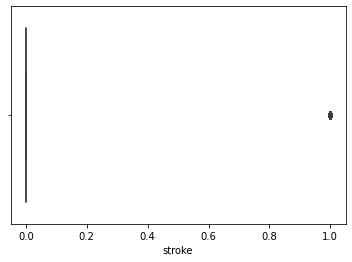

QQPlot of stroke Data


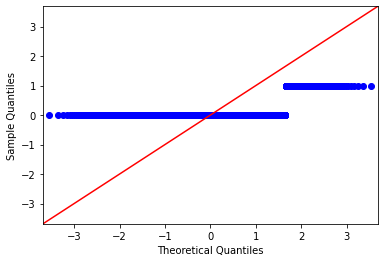

Discriptive Stat of stroke Data
count    5110.000000
mean        0.048728
std         0.215320
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64
Normality Test of stroke Data
Statistics=0.220, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\waliullah\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [10]:
def visual(data):
    col=input("Enter Column Name:")
    data[col].hist()
    print("Histogram of", col, "Data")
    py.show()
    sns.boxplot(data[col])
    print("Boxplot of", col, "Data")
    py.show()
    sm.qqplot(data[col], line ='45') 
    print("QQPlot of", col, "Data")
    py.show() 
    
    print("Discriptive Stat of", col, "Data")
    print(data[col].describe())
    #print(ddf1)
    print("Normality Test of", col, "Data")
    # normality test
    stat, p = shapiro(data[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

        
visual(df)

F9: Function for categorical data analysis - includes value counts, and bar charts

In [11]:
def visual2(data):
    col=input("Enter Column Name:")
    count_no_sub = len(data[data[col]==0])
    count_sub = len(data[data[col]==1])
    pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
    print('Number of Zero Catagory',count_no_sub)
    print("percentage of no subscription is", pct_of_no_sub*100)
    pct_of_sub = count_sub/(count_no_sub+count_sub)
    print('Number of One Catagory',count_sub)
    print("percentage of subscription", pct_of_sub*100)
    
    data[col].hist()
    print("Histogram of", col, "Data")
    py.show()
    print("Discriptive Stat of", col, "Data")
    print(data[col].describe())
    print("Barplot of", col, "Data")
    sns.countplot(x=data[col], data=data, palette='hls')
    plt.show()

Enter Column Name:stroke
Number of Zero Catagory 4861
percentage of no subscription is 95.12720156555773
Number of One Catagory 249
percentage of subscription 4.87279843444227
Histogram of stroke Data


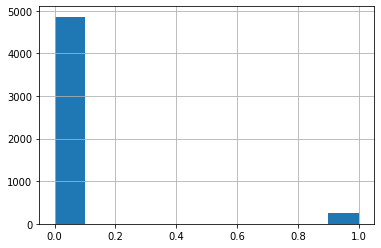

Discriptive Stat of stroke Data
count    5110.000000
mean        0.048728
std         0.215320
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64
Barplot of stroke Data


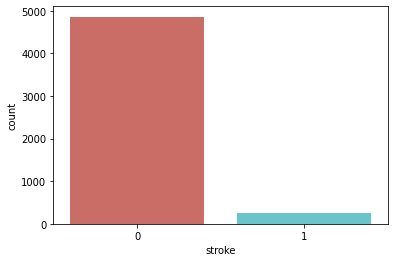

In [12]:
visual2(df)

F-10:Function to change the type of any column (input col name and the type you want)

In [13]:
def change_type(data):
    col=input("Enter Column Name:")
    print("Choose among Int, Float, String")
    option=input("Enter Option Name:")
    if option=='Int':
        data[col]=data[col].astype(int).dtypes
    elif option=='Flot':
        data[col]=data[col].astype(float).dtypes
    elif option=='String':
        data[col]=data[col].astype(str).dtypes
    return data

df=change_type(df)

Enter Column Name:gender
Choose among Int, Float, String
Enter Option Name:String


F13: function to make a deep copy of a dataframe

In [57]:
def deep_copy (data):
    data_deepcopy = data.copy()
    return data_deepcopy

dfs=deep_copy(df)


In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

def ordinal_example(data):
    oe = OrdinalEncoder()
    oe.fit(data)
    data_enc = oe.transform(data)
    return data_enc

def label_example(data):
    oe = LabelEncoder()
    oe.fit(data)
    data_enc = oe.transform(data)
    return data_enc

def onehot_example(data):
    oe = OneHotEncoder()
    oe.fit(data)
    data_enc = oe.transform(data)
    return data_enc

In [16]:
strokedf['smoking_status'] = strokedf['smoking_status'].replace({'never smoked':'nsmoke','formerly smoked':'fsmoked'})
strokedf['stroke'] = strokedf['stroke'].astype(str)
strokedf['stroke'] = strokedf['stroke'].replace({'1':'Yes','0':'No'})
catdata = strokedf[['ever_married','work_type','smoking_status','Residence_type']]
strokedf[['ever_married','work_type','smoking_status','Residence_type']] = ordinal_example(catdata)
strokedf = strokedf.copy(deep=True)
strokedf['ever_married'] = label_example(strokedf['ever_married'])
strokedf['work_type'] = label_example(strokedf['work_type'])
strokedf['smoking_status'] = label_example(strokedf['smoking_status'])
strokedf['Residence_type'] = label_example(strokedf['Residence_type'])

strokedf = strokedf.loc[:, strokedf.columns != 'stroke']
strokedf = pd.get_dummies(strokedf)
strokedf['hypertension'] = strokedf['hypertension'].astype(str)
strokedf['hypertension'] = strokedf['hypertension'].replace({'1':'Yes','0':'No'})

strokedf['heart_disease'] = strokedf['heart_disease'].astype(str)
strokedf['heart_disease'] = strokedf['heart_disease'].replace({'1':'Yes','0':'No'})
#strokedf['gender'] = strokedf['gender'].astype(str)
#strokedf['gender'] = strokedf['gender'].replace({'Male':'Yes','Female':'No'})
strokedf = pd.get_dummies(strokedf)
strokedf.head(10)

NameError: name 'strokedf' is not defined

In [58]:
dfs.shape

(5110, 12)

F4: remove rows containing a particular value of a given column, e.g., in smoking_status column, I don't want to consider non-smokers in my ML problem so I remove all these rows.

In [59]:
#Delete Rows which has value of a1 to be given as string
#Delete rows with has the value a1
#Delete Rows with outlier values specify column and value as a2
def delrows(data, col, a2):
    df=data
    #delete the the outliers
    df.drop(df[df[col] == a2].index, inplace = True)
    print (df.shape)
    return df


dfs=delrows(dfs, 'gender', 'Other')


(5110, 12)


F14: function to encode categorical into numerical (label, ordinal, or onehot)

In [60]:
def disc_cata(data):
    col=input("Enter Column Name:")
    print("Choose among ReplaceValues, One-Hot, Binary")
    option=input("Enter Option Name:")
    if option=='ReplaceValues':
        labels = data[col].astype('category').cat.categories.tolist()
        replace_map_comp = {col : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
        print(replace_map_comp)
        data.replace(replace_map_comp, inplace=True)
    elif option=='One-Hot':
        data= pd.get_dummies(data, columns=[col], prefix = ['col'])

    elif option=='Binary':
        df_flights_ce = data.copy()
        encoder = ce.BinaryEncoder(cols=[col])
        data = encoder.fit_transform(df_flights_ce)
    return data

In [61]:
dfs=disc_cata(dfs)    #gender binary

Enter Column Name:gender
Choose among ReplaceValues, One-Hot, Binary
Enter Option Name:One-Hot


In [62]:
dfs=disc_cata(dfs)    #ever_married binary

Enter Column Name:ever_married
Choose among ReplaceValues, One-Hot, Binary
Enter Option Name:Binary


In [63]:
dfs=disc_cata(dfs)          #work_type one-hot

Enter Column Name:work_type
Choose among ReplaceValues, One-Hot, Binary
Enter Option Name:One-Hot


In [64]:
dfs=disc_cata(dfs)            #Residence_type binary

Enter Column Name:Residence_type
Choose among ReplaceValues, One-Hot, Binary
Enter Option Name:Binary


In [65]:
dfs=disc_cata(dfs)           #smoking_status   one hot


Enter Column Name:smoking_status
Choose among ReplaceValues, One-Hot, Binary
Enter Option Name:One-Hot


In [66]:
dfs=dfs.drop(['id'], axis=1)

In [67]:
dfs1=dfs.copy()

In [68]:
import category_encoders as ce   # version 1.2.8
from sklearn.preprocessing import LabelEncoder

In [69]:
dfs1.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married_0',
       'ever_married_1', 'Residence_type_0', 'Residence_type_1',
       'avg_glucose_level', 'bmi', 'stroke', 'col_object', 'col_Govt_job',
       'col_Never_worked', 'col_Private', 'col_Self-employed', 'col_children',
       'col_Unknown', 'col_formerly smoked', 'col_never smoked', 'col_smokes'],
      dtype='object')

In [70]:
dfs1

,age,hypertension,heart_disease,ever_married_0,ever_married_1,Residence_type_0,Residence_type_1,avg_glucose_level,bmi,stroke,col_object,col_Govt_job,col_Never_worked,col_Private,col_Self-employed,col_children,col_Unknown,col_formerly smoked,col_never smoked,col_smokes
0,67.0,0,1,0,1,0,1,228.69,36.60,1,1,0,0,1,0,0,0,1,0,0
1,61.0,0,0,0,1,1,0,202.21,34.55,1,1,0,0,0,1,0,0,0,1,0
2,80.0,0,1,0,1,1,0,105.92,32.50,1,1,0,0,1,0,0,0,0,1,0
3,49.0,0,0,0,1,0,1,171.23,34.40,1,1,0,0,1,0,0,0,0,0,1
4,79.0,1,0,0,1,1,0,174.12,24.00,1,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,0,1,0,1,83.75,29.30,0,1,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,0,1,0,1,125.20,40.00,0,1,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,0,1,1,0,82.99,30.60,0,1,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,0,1,1,0,166.29,25.60,0,1,0,0,1,0,0,0,1,0,0


F15: function to split dataframe into X (predictors) and y (label), apply standard scaling on X, apply the desired ML algorithm and output the results:¶
Â - input dataframe Â - input the algo name (e.g., decisiontree) Â - input whether this is a classification task or a regression task (then you should select either decisiontreeclassifier or decisiontreeregressor within the function) Â - for classification, output confusion matrix, AUC, logloss and classification report Â - for regression, output MAE, MSE, R-squared and adjusted R-squaredÂ Â - NB: you can add more metrics if available

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB  
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [32]:
def LReg(x_train, x_test, y_train, y_test):
    print('================================================================================')
    print('Linear Regression Model Results')
    print('_______________________________________________________________________________')
    #LinearRegression model
    LR = LinearRegression(normalize=True)

    #fit
    LR.fit(x_train, y_train)

    #predict
    y_predict = LR.predict(x_test)

    #score variables
    LR_MAE = round(MAE(y_test, y_predict),2)
    LR_MSE = round(MSE(y_test, y_predict),2)
    LR_R_2 = round(R2(y_test, y_predict),4)
    LR_CS  = round(CVS(LR, x, y, cv=5).mean(),4)

    print(f" Mean Absolute Error: {LR_MAE}\n")
    print(f" Mean Squared Error: {LR_MSE}\n")
    print(f" R^2 Score: {LR_R_2}\n")
    cross_val(LR,LinearRegression(),x,y,5)
    Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
    Linear_Regression
    print('================================================================================')


def LASOO(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Lasso Regression Model Results')
    print('_______________________________________________________________________________')
    LS = Lasso(alpha = 0.9)
    #fit
    LS.fit(x_train,y_train)

    #predict
    y_predict = LS.predict(x_test)

    #score variables
    LS_MAE = round(MAE(y_test, y_predict),2)
    LS_MSE = round(MSE(y_test, y_predict),2)
    LS_R_2 = round(R2(y_test, y_predict),4)
    LS_CS  = round(CVS(LS, x, y, cv=5).mean(),4)

    print(f" Mean Absolute Error: {LS_MAE}\n")
    print(f" Mean Squared Error: {LS_MSE}\n")
    print(f" R^2 Score: {LS_R_2}\n")
    cross_val(LS,Lasso(alpha = 0.05),x,y,5)
    Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
    Lasso_Regressor 
    print('================================================================================')

    
    
#Decision Tree for Regression    
    


def DTReg(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Decision Tree Model Results for Regression Problem')
    print('_______________________________________________________________________________')
    
    #from sklearn.tree import DecisionTreeRegressor
    #from sklearn import metrics
    regressor = DecisionTreeRegressor()
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)

    df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    df
    #from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    dt_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
    dt_Regressor 
    print('================================================================================')


#KNN for Regression    
def KNNReg(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('KNN Model Results for Regression Problem')
    print('_______________________________________________________________________________')  
        
    #from sklearn.neighbors import KNeighborsClassifier
    knn_reg = KNeighborsRegressor(n_neighbors=5)
    knn_reg.fit(x_train, y_train)
    y_pred = knn_reg.predict(x_test)
    
    
    df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    #df
    #from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    knn_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
    knn_Regressor 
    print('================================================================================')

    
    error = []

# Calculating error for K values between 1 and 40
    for i in range(1, 40):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(x_train, y_train)
        pred_i = knn.predict(x_test)
        error.append(np.mean(pred_i != y_test))
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    print('================================================================================')

    
    
    
    
    
    
    
    
    
    
    
    
    
#Classification Functions

#Decision Tree for Classification
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import classification_report, confusion_matrix
def DTClassification(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Decision Tree Model Results for Classification Problem')
    print('_______________________________________________________________________________')
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
#from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    



#Building Naive Bayes for Classification
def NBClassification(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('Naive Bayes Model Results for Classification Problem')
    print('_______________________________________________________________________________')  
    
    # Fitting Naive Bayes to the Training set  
#from sklearn.naive_bayes import GaussianNB  
    classifier = GaussianNB()  
    classifier.fit(x_train, y_train)  
# Predicting the Test set results  
    y_pred = classifier.predict(x_test) 
# Making the Confusion Matrix  
#from sklearn.metrics import confusion_matrix  
    cm = confusion_matrix(y_test, y_pred)  
    print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))
    print(y_test, y_pred)
    print('================================================================================')

#KNN for Classification    
def KNNClassification(x_train, x_test, y_train, y_test):
    #model
    print('================================================================================')
    print('KNN Model Results for Classification Problem')
    print('_______________________________________________________________________________')  
        
    #from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(x_train, y_train)
    
    y_pred = classifier.predict(x_test)
    #from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    error = []

# Calculating error for K values between 1 and 40
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        pred_i = knn.predict(x_test)
        error.append(np.mean(pred_i != y_test))
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    print('================================================================================')

    
    
    
    

In [51]:
data=dfs1
dep_var=input("The Label Variable:")
data_final_vars=data.columns.values.tolist()
y=dep_var
X=[i for i in data_final_vars if i not in y]

The Label Variable:stroke


In [53]:
y

'stroke'

In [78]:
def ML_alg(data):
    
    print("Choose among KNN, DecisionTree, etc")
    alg=input("Enter Algorithm Name:")
    print("Choose C for Classification and R for Regression Problem")
    option=input("Is it Classification Probelem or Regression Task:")
    print("Choose The Label")
    dep_var=input("The Label Variable:")
    print('Choose Scaling Method i.e. MinMaxScaler, StandardScaler ')
    transform=input("Enter the Scaling Method:")
    #Label and Predictors
    data_final_vars=data.columns.values.tolist()
    y1=dep_var
    X1=[i for i in data_final_vars if i not in y1]
    
    y=data[y1]
    X=data[X1]
    #X = data.iloc[:, :-1].values
    #y = data.iloc[:, 12].values
    
    if transform=='MinMaxScaler':
        scaler = MinMaxScaler()
        # transform data
        X = scaler.fit_transform(X)
    if transform=='StandardScaler':
        scaler = StandardScaler()
        # transform data
        X = scaler.fit_transform(X)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)   
        
    
    if option=='C':
        if alg=='KNN':
            #KNN Classification Algrotham
            KNNClassification(x_train, x_test, y_train, y_test)
        elif alg=='DecisionTree':
            #Decision tree function for classification
            DTClassification(x_train, x_test, y_train, y_test)
        elif alg=='NaiveBayes':
            #NaiveBayes function for NaiveBayes
            NBClassification(x_train, x_test, y_train, y_test)
        elif alg=='LogisticReg':
            #Logistic Regression for Classification
            print('not ready now')
    elif option=='R':
        if alg=='KNN':
            #KNN Regrssion Algrotham
            KNNReg(x_train, x_test, y_train, y_test)
        elif alg=='DecisionTree':
            #Decision tree function for Regression
            DTReg(x_train, x_test, y_train, y_test)
        elif alg=='OLS':
            #OLS function for Regression
            LReg(x_train, x_test, y_train, y_test)
        elif alg=='Lasso':
            #Lasso function for Regression
            LASOO(x_train, x_test, y_train, y_test)
        elif alg=='NaiveBayes':
            print('Naive Bayse is only for Classification Problems')
        elif alg=='LogisticReg':
            print('Logistic Function is only for Classification Problems')
            

Choose among KNN, DecisionTree, etc
Enter Algorithm Name:KNN
Choose C for Classification and R for Regression Problem
Is it Classification Probelem or Regression Task:C
Choose The Label
The Label Variable:stroke
Choose Scaling Method i.e. MinMaxScaler, StandardScaler 
Enter the Scaling Method:MinMaxScaler
KNN Model Results for Classification Problem
_______________________________________________________________________________
[[1205    8]
 [  63    2]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1213
           1       0.20      0.03      0.05        65

    accuracy                           0.94      1278
   macro avg       0.58      0.51      0.51      1278
weighted avg       0.91      0.94      0.92      1278



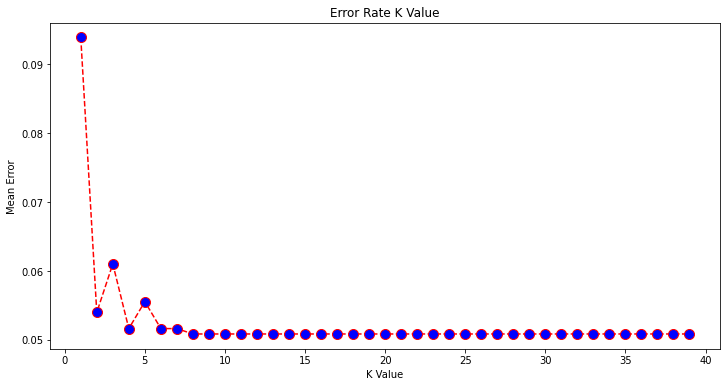

In [79]:
ML_alg(dfs1)